Kaggle Dataset
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [2]:
df = pd.read_csv('train.csv')  #importing the data into a pandas df

In [3]:
df.shape

(1460, 81)

In [4]:
df.head()  #checking out what all the columns look like

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Sale Price is the target variable, so let's check what that looks like


 mu = 180921.20 and sigma = 79415.29



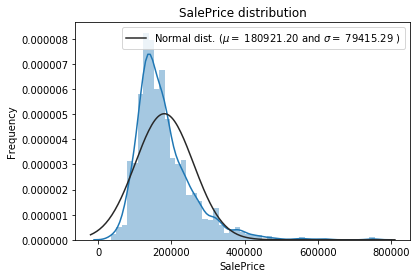

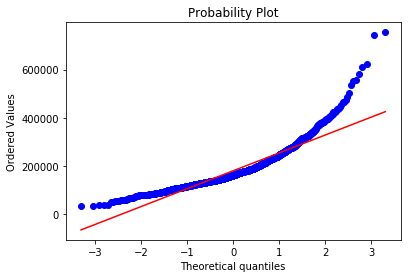

In [5]:
sns.distplot(df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()

### It appears that the distribution is skewed to the right, and linear models prefer normally distributed data, so I'll transform the variable to make it normally distributed.  (using the log of the target variable)


 mu = 12.02 and sigma = 0.40



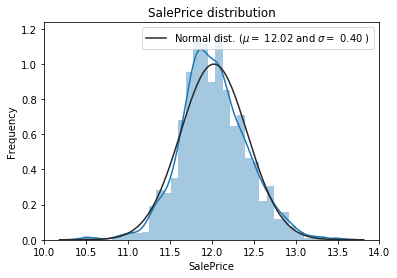

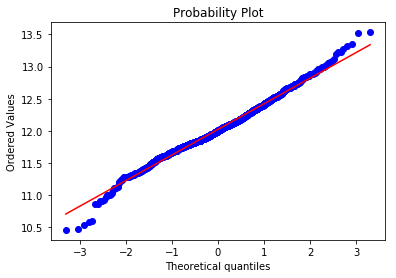

In [6]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df["SalePrice"] = np.log1p(df["SalePrice"])

#Check the new distribution 
sns.distplot(df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()

### This is much better, as you can see the distribution is now a more normal distribution

Checking df.info, I see that there are 81 columns, which is too much, I'm sure some are better predictors than others, and so I want to reduce this down to find which ones are the best predictors.

I want to make sure I capture the best features.
I want to make sure I exclude any features that may have collinearity with others.
I'll check columns that have a lot of missing values, unless they show something with a very high level of certainty, I'll probably want to exclude

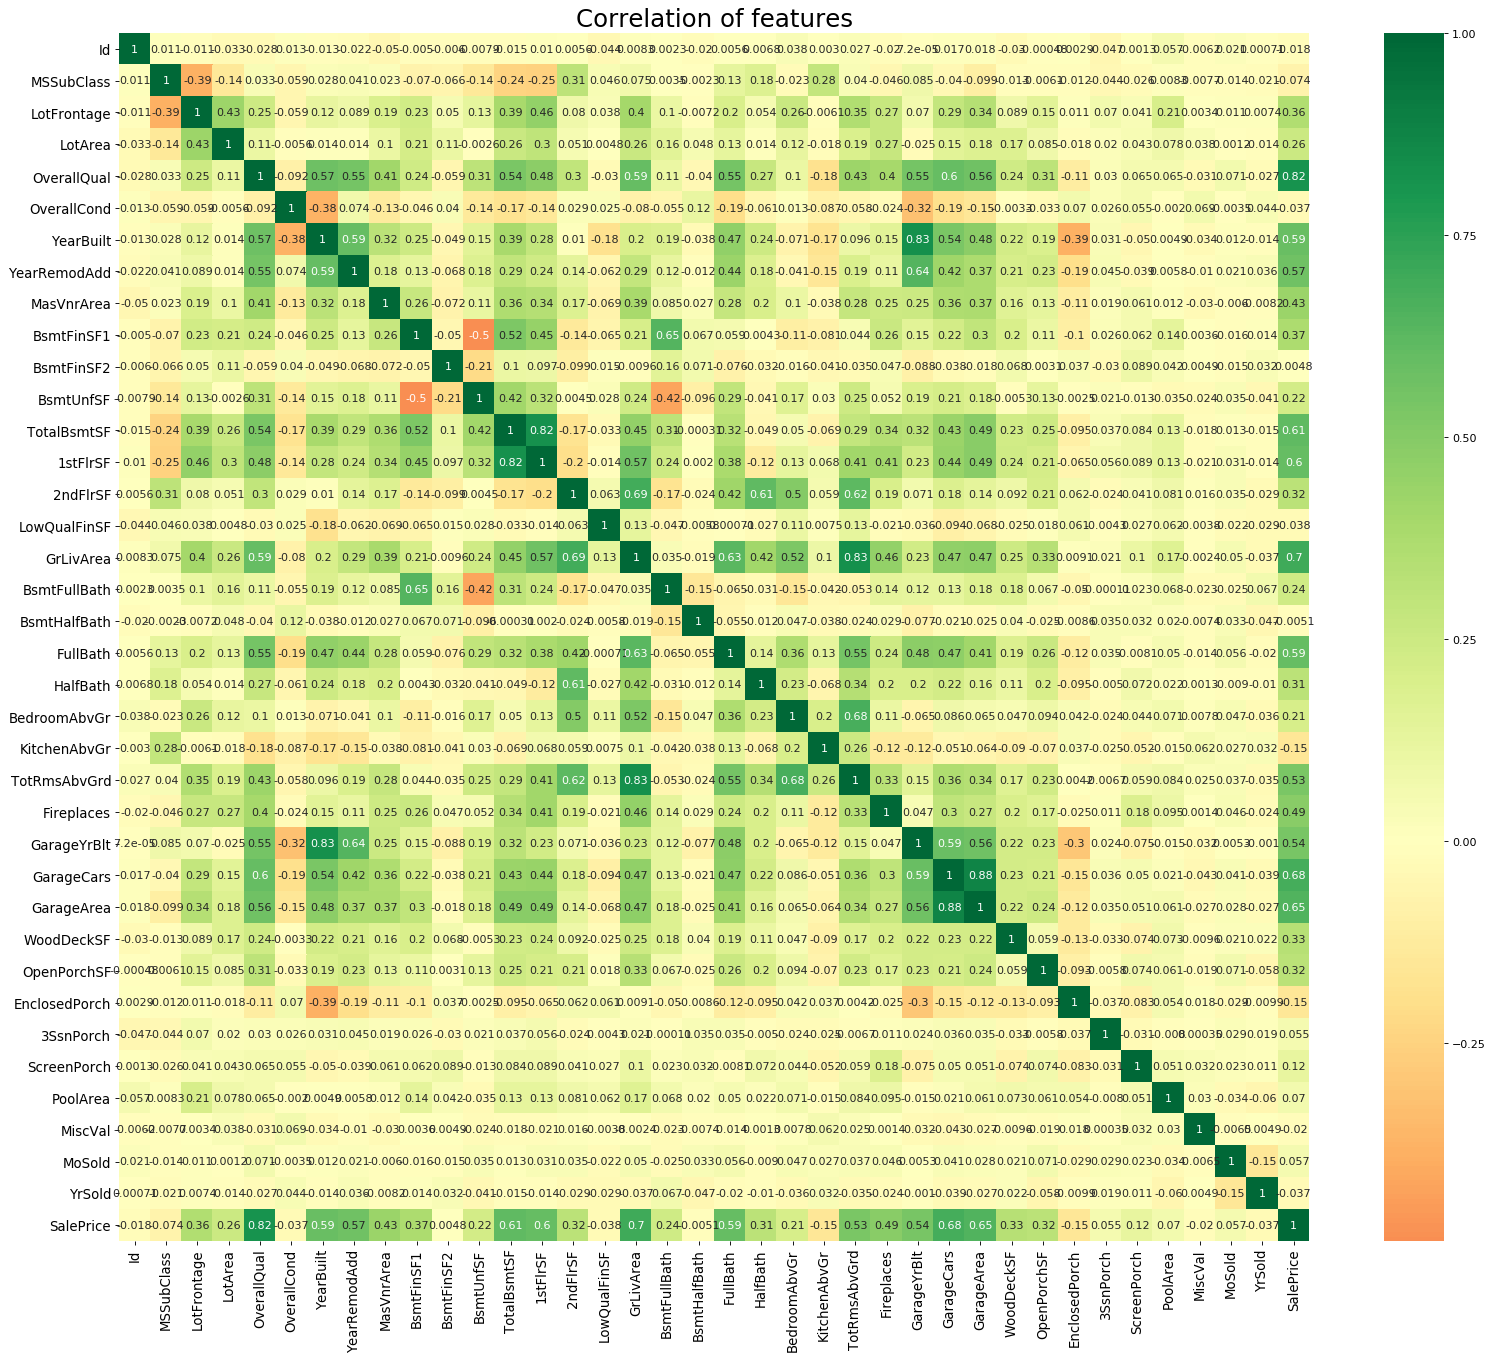

In [7]:
# Plotting correlation heatmap
plt.figure(figsize=(24,20), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlation of features', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Features I can eliminate:

I believe I can eliminate GarageYrBlt, as it is highly correlated to YearBuilt(.83 correlation score), and I think YearBuilt will be a better predictor

GarageCars and GarageArea, as you expect are highly correlated (.88).  I couldn't choose between which may be better, thinking GarageCars may be simpler, but after checking scatter plots (below), I decided to go with GarageArea, as I think it will show the relationship better.

TotRmsAbvGrd (total rooms above grade) seems highly correlated to GrLivArea: (Above grade (ground) living area square feet), so I will eliminate the first.

Utilities, nearly everything is one value, so I will not use it as a feature.

Street and Alley also don't have many values, and they don't look predictive, so I will not use.

In [8]:
df.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

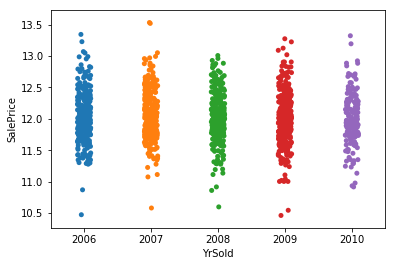

In [9]:
#Using Seaborns Jitterfeature on the stripplot shows this a little nicer, but this also doesn't look very predictive over the 5 years of data.  Let's drop it.
sns.stripplot(x=df.YrSold, y=df.SalePrice)

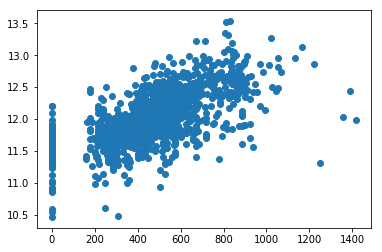

In [10]:
plt.scatter(x=df.GarageArea, y=df.SalePrice)

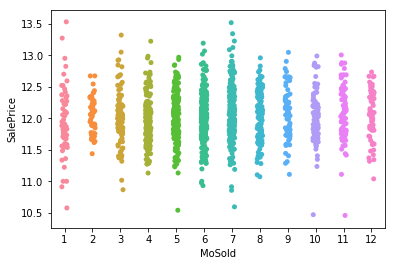

In [11]:
#Checking to see how month may work as a feature
#I would hesitate to keep this without year, but seasonality can be a contributor to housing prices, so it wouldn't exclude
#it based on that.  This just doesn't look like it will be a very predictive feature.
sns.stripplot(x=df.MoSold, y=df.SalePrice)

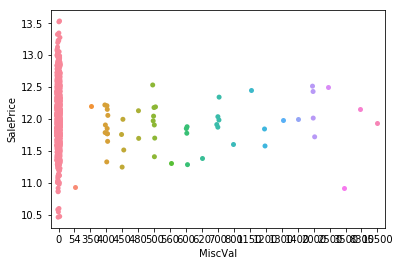

In [12]:
#It looks like 85% of the data is all one value, and the balance don't show to be descriptive of any pattern.  I will drop this feature.
sns.stripplot(x=df.MiscVal, y=df.SalePrice)

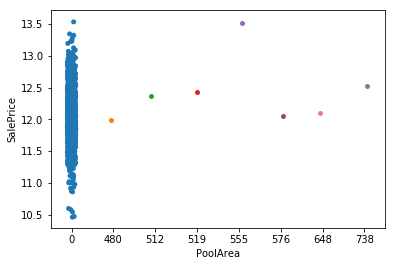

In [13]:
#I thought Pool Area would be an important feature, but there doesn't seem like there are enough Pools, and they do not look like
#they show added value in this dataset, so will not be a good predictor by itself.
sns.stripplot(x=df.PoolArea, y=df.SalePrice)

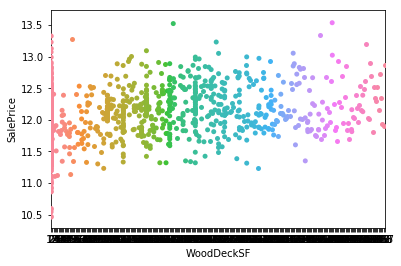

In [14]:
sns.stripplot(x=df.WoodDeckSF, y=df.SalePrice)

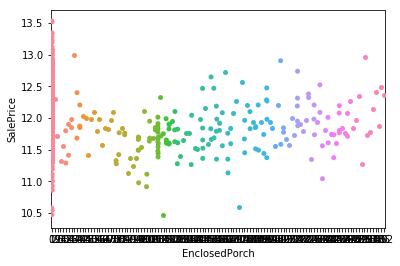

In [15]:
sns.stripplot(x=df.EnclosedPorch, y=df.SalePrice)

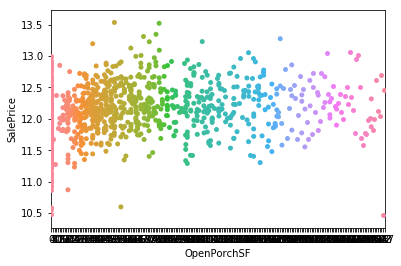

In [16]:
sns.stripplot(x=df.OpenPorchSF, y=df.SalePrice)

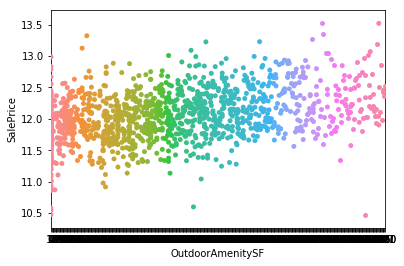

In [17]:
#I haven't seen much of a relationship with many of the porch space and the pool against sale price, but let's see if we combine all
#of these features as an outdoor amenity SF feature, maybe that will show some relationship, or allows us to combine this, as they are similar features/qualities
#that homebuyers may be looking for
df['OutdoorAmenitySF'] = df['OpenPorchSF']+df['WoodDeckSF']+df['EnclosedPorch']+df['PoolArea']+df['ScreenPorch']+df['3SsnPorch']
sns.stripplot(x=df['OutdoorAmenitySF'], y=df.SalePrice)

##### I'm not 100% sure this shows a relationship, but it does look slightly better, and it allows me to combine 6 features into one that
##### are possibly similar in what home buyers are looking for.  I believe they are showing more of a relationship than any of them were
##### showing by themselves, so I'll keep them as a combined feature.

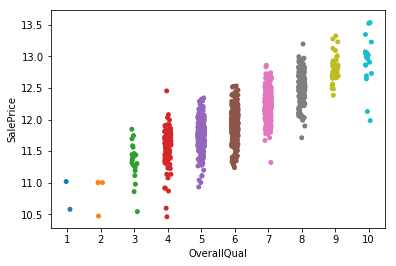

In [18]:
#Seems to be a great predictor, but I wonder if it is too highly correlated to some other features...
#I will have to look into this more later
sns.stripplot(x=df['OverallQual'], y=df.SalePrice)

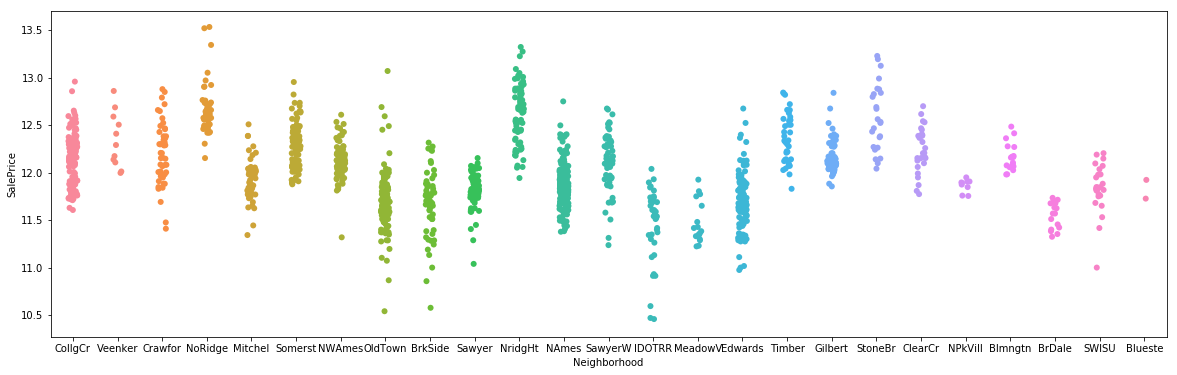

In [19]:
plt.figure(figsize=(20, 6))
sns.stripplot(x=df['Neighborhood'], y=df.SalePrice, size=6)

In [20]:
len(set(df.Neighborhood))

25

There are 25 neighborhoods, I'm going to group them based on the above graph and mean value sale price, into 5 categories

In [21]:
df['Neighborhood'].replace(to_replace={'CollgCr':'MedNeighb', 'Veenker':'MedNeighb', 'Crawfor':'MedNeighb', 'Timber':'MedNeighb', 'Somerst':'MedNeighb', 'Gilbert':'MedNeighb','ClearCr':'MedNeighb',
                                      'NoRidge':'ExpNeighb', 'NridgHt':'ExpNeighb', 'StoneBr':'ExpNeighb', 'Mitchel':'LMedNeighb','NWAmes':'LMedNeighb', 'NAmes':'LMedNeighb',
                                       'SawyerWNeighborhood':'LMedNeighb', 'SawyerW':'LMedNeighb', 'Edwards':'LMedNeighb', 'Blmngtn':'LMedNeighb', 'IDOTRR':'ChpNeighb', 'MeadowV':'ChpNeighb', 'Sawyer':'ChpNeighb',
                                      'BrkSide':'ChpNeighb', 'NPkVill':'ChpNeighb', 'OldTown':'LMedNeighb', 'SWISU':'ChpNeighb', 'Blueste':'ChpNeighb', 'BrDale':'ChpNeighb'}, inplace=True)

In [22]:
df.Neighborhood.value_counts()

LMedNeighb    636
MedNeighb     443
ChpNeighb     238
ExpNeighb     143
Name: Neighborhood, dtype: int64

In [23]:
#Use pandas Replace method to make 1 half bath == .5, and 2 ==1
df['HalfBath'].replace(to_replace={0:0, 1:.5, 2:1}, inplace=True)

In [24]:
#Make one column of Full Bathrooms and Half Bathrooms combined, which should capture the trajectory of bathrooms to house price
#better than when they were seperated
df['Bathrooms'] = df['FullBath']+df['HalfBath']

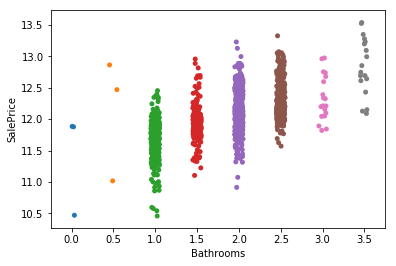

In [25]:
sns.stripplot(x=df['Bathrooms'], y=df.SalePrice)

In [26]:
#first round of drops based on correlation
df.drop(labels=['Id','MSZoning','Street','Alley','LotShape','LandContour','GarageYrBlt', 'GarageCars', 'YrSold', 'MoSold',
                'Utilities', 'TotRmsAbvGrd', 'WoodDeckSF', 'LotConfig', 'GrLivArea','LandSlope', 'Condition2','OverallCond',
                'RoofMatl', 'Exterior1st', 'Exterior2nd','MasVnrType', 'ExterCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFinType2', 'BsmtFinSF1','Electrical', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath',
               'MiscVal', 'PoolArea','3SsnPorch', 'ScreenPorch', 'EnclosedPorch', 'OpenPorchSF', 'WoodDeckSF', 'KitchenAbvGr',
               'BsmtHalfBath','BsmtFullBath','SaleCondition','SaleType','MiscFeature','Fence','PoolQC', 'GarageCond', 'GarageQual',
               'GarageType','FullBath', 'Condition1', 'HouseStyle', 'FireplaceQu'], axis=1, inplace=True)

In [27]:
#From 81, down to 29 features.  This number will now increase as some of the columns are categorical(strings) and so will need to
#Dummify them to make numerical
len(df.columns)

29

In [28]:
#These features I will dummy the columns and use drop first, since I am keeping all, but making one the baseline
df = pd.get_dummies(df,columns=['BsmtQual','KitchenQual', 'GarageFinish', 'ExterQual', 'Neighborhood'], drop_first=True)

#### Just to show my process, for dummying and dropping columns.  

##### I am checking the graph/plot to see if each column and it's values, show any sort of relationship to the sale price (as that is what we are trying to predict).
##### I would ideally like to see some sort of positive or grouping relationship in these categories, that will help the predict sale price later on.
##### So this helps me decide whether I should keep/drop a column, dummy one value of a column, or drop multiple into the "baseline".

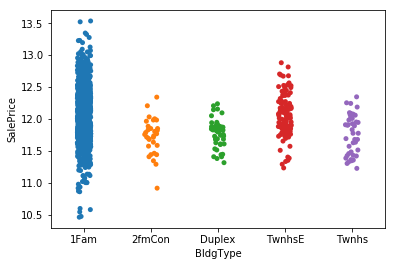

In [29]:
#I'll dummy this data, but only keep the 1Fam and TwnhsE, the other 3 I will join together, and leave as the baseline, 
#as they are similar enough
sns.stripplot(x=df['BldgType'], y=df.SalePrice)

In [30]:
df = pd.get_dummies(df,columns=['BldgType'])
df.drop(inplace=True, axis=1, columns=['BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs'])

In [31]:
#RoofStyle looks similar to BldgType, I'll use the same reasoning where I'll keep Gable and Hip, and the rest will be dropped to the baseline.
df = pd.get_dummies(df,columns=['RoofStyle'])
df.drop(inplace=True, axis=1, columns=['RoofStyle_Flat','RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed'])

In [32]:
#Foundation, I want to show PConc, CBlock, and the rest will be my baseline
df = pd.get_dummies(df,columns=['Foundation'])
df.drop(axis=1, inplace=True, columns=['Foundation_Wood', 'Foundation_Stone', 'Foundation_Slab', 'Foundation_BrkTil'])

In [33]:
#Heating I will dummy so that Grav, Wall, OthW and Floor are all the baseline, even though they aren't a ton of data points, I do
#think that it caps the upside and pricing of a house
df = pd.get_dummies(df,columns=['Heating'])
df.drop(inplace=True, axis=1, columns=['Heating_Wall', 'Heating_Floor', 'Heating_OthW', 'Heating_Grav'])

In [34]:
#HeatingQC, I'll dummy so that it shows Ex(cellent), and I'll drop Gd and TA merged as the baseline.  Even though it's only one data
#point, I'll merge Po in with Fa
df = pd.get_dummies(df,columns=['HeatingQC'])
df.drop(inplace=True, axis=1, columns=['HeatingQC_Gd', 'HeatingQC_TA', 'HeatingQC_Fa', 'HeatingQC_Po'])

In [35]:
df = pd.get_dummies(df,columns=['CentralAir'])
df.drop(inplace=True, axis=1, columns=['CentralAir_N'])

In [36]:
#Functional, I will keep only the Typ value column, the rest will be the baseline, as they show similar patterns
df = pd.get_dummies(df,columns=['Functional'])
df.drop(inplace=True, axis=1, columns=['Functional_Maj1', 'Functional_Min1', 'Functional_Min2','Functional_Mod','Functional_Maj2','Functional_Sev'])

In [37]:
df = pd.get_dummies(df,columns=['PavedDrive'])
df.drop(inplace=True, axis=1, columns=['PavedDrive_P', 'PavedDrive_N'])

#### Need to deal with missing values in 2 columns (LotFrontage and MasVnrArea)

In [38]:
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)

In [39]:
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace=True)

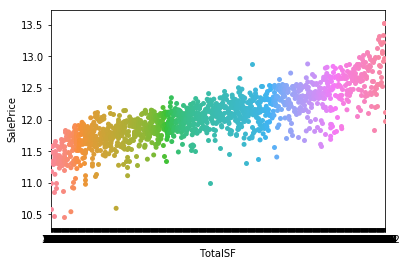

In [40]:
#Combining many of the features that go into SF, as their relationship is either just as strong or stronger showing a positive trending relationship
df['TotalSF'] = df['2ndFlrSF'] + df['1stFlrSF']+df['TotalBsmtSF']
sns.stripplot(x=df['TotalSF'], y=df['SalePrice'])
df.drop(inplace=True, axis=1, columns=['2ndFlrSF','1stFlrSF','TotalBsmtSF'])

#### I'm now back up to 40 columns, once the object columns were dummied.
#### These are all now integers or floats

In [42]:
y = df['SalePrice']
df.drop(inplace=True, axis=1, columns=['SalePrice'])

In [43]:
X = df

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle=True, random_state=23)

In [62]:
model = GradientBoostingRegressor(loss='huber',learning_rate = .05, n_estimators=1500, subsample=.75,
                                    random_state=23, max_features=6, verbose=1)

In [63]:
model.fit(X_train, y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.0713           0.0044            5.69s
         2           0.0660           0.0043            4.77s
         3           0.0657           0.0038            4.69s
         4           0.0621           0.0034            4.70s
         5           0.0574           0.0036            4.64s
         6           0.0527           0.0029            4.67s
         7           0.0512           0.0026            4.66s
         8           0.0471           0.0025            4.65s
         9           0.0435           0.0028            4.72s
        10           0.0430           0.0020            4.75s
        20           0.0250           0.0012            4.00s
        30           0.0169           0.0006            4.46s
        40           0.0126           0.0003            4.36s
        50           0.0098           0.0002            4.09s
        60           0.0083           0.0001            4.06s
       

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3, max_features=6,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1500, n_iter_no_change=None, presort='auto',
             random_state=23, subsample=0.75, tol=0.0001,
             validation_fraction=0.1, verbose=1, warm_start=False)

In [64]:
model.score(X_test, y_test)

0.8759861332065413

### Using Gradient Boosting and after some tweaking, I was able to achieve an 88% score.  I've tried multiple other models, but this was the best.  This used 41 features

In [51]:
model.feature_importances_

array([0.00517537, 0.01870679, 0.04784325, 0.15756569, 0.04165406,
       0.06863909, 0.01021983, 0.00566934, 0.05465986, 0.06993551,
       0.01374039, 0.09121029, 0.00055777, 0.00514374, 0.00227068,
       0.00580224, 0.00329819, 0.02664669, 0.00199642, 0.00720451,
       0.0006974 , 0.0410767 , 0.01262291, 0.02869705, 0.0039171 ,
       0.01155595, 0.00207827, 0.00034883, 0.00156149, 0.00039004,
       0.00052919, 0.00446207, 0.00095254, 0.00023663, 0.00330497,
       0.01438921, 0.0018493 , 0.00287198, 0.23051868])

### I'm now going to reduce the number of features down to 10, to see if in a less dimensional space, both regression techniques are better predictors

In [52]:
df2 = df[['LotArea','OverallQual', 'YearBuilt', 'GarageArea', 'OutdoorAmenitySF','Bathrooms', 'TotalSF', 'Neighborhood_ExpNeighb', 'Neighborhood_LMedNeighb',
       'Neighborhood_MedNeighb']]

In [53]:
X2_train, X2_test, y2_train, y2_test = train_test_split(df2, y,shuffle=True, random_state=23)

In [54]:
model2 = GradientBoostingRegressor(loss='huber',learning_rate = .01, n_estimators=1300,
                                   subsample=.75, random_state=23, max_features=6, verbose=1)

In [55]:
model2.fit(X2_train, y2_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.0745           0.0010            9.36s
         2           0.0724           0.0010            6.25s
         3           0.0755           0.0011            5.03s
         4           0.0745           0.0009            4.41s
         5           0.0729           0.0011            4.04s
         6           0.0702           0.0010            3.86s
         7           0.0706           0.0010            3.92s
         8           0.0676           0.0010            3.96s
         9           0.0648           0.0011            3.92s
        10           0.0673           0.0009            3.80s
        20           0.0564           0.0008            3.63s
        30           0.0501           0.0006            3.45s
        40           0.0423           0.0006            3.18s
        50           0.0368           0.0005            2.98s
        60           0.0336           0.0004            2.89s
       

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='huber', max_depth=3, max_features=6,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1300, n_iter_no_change=None, presort='auto',
             random_state=23, subsample=0.75, tol=0.0001,
             validation_fraction=0.1, verbose=1, warm_start=False)

In [56]:
model2.score(X2_test, y2_test)

0.8580540300102919

In [57]:
model2.feature_importances_

array([0.03562153, 0.33152559, 0.07802583, 0.04390285, 0.01680428,
       0.02865108, 0.43243517, 0.0094619 , 0.00784606, 0.01572572])

### With only 10 features, I was able to achieve a score of nearly 86%, which is enough of a decrease to make me want to use the model that had the full 43 features.  There might be an argument that for this amount of data, a higher dimensional space may not be best, but I'd still like to have the better performing model.

#### Let's Grid Search to see if we can fine-tune any hyper-parameters and improve performance

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
params = {'learning_rate':(.01, .05), 'n_estimators':(300,800,1,200), 'subsample':(.5,.75,1), 'max_features':(3,6,8)}
GBR = GradientBoostingRegressor(loss='huber',random_state=23)
clf = GridSearchCV(GBR, params, n_jobs=-1,cv=5)

In [60]:
clf.fit(df,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_sa...       subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate': (0.01, 0.05), 'n_estimators': (300, 800, 1, 200), 'subsample': (0.5, 0.75, 1), 'max_features': (3, 6, 8)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [61]:
clf.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=3, max_features=6,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=800, n_iter_no_change=None, presort='auto',
             random_state=23, subsample=0.75, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

I took my grid-search best estimators and plugged into the above

### I'm now going to import the actual test data,, and follow the same process so that my dataframe will matchup, so I can input it into the model.  Then I can see how I do.

In [65]:
test = pd.read_csv('test.csv')

In [66]:
test['OutdoorAmenitySF'] = test['OpenPorchSF']+test['WoodDeckSF']+test['EnclosedPorch']+test['PoolArea']+test['ScreenPorch']+test['3SsnPorch']

In [67]:
test['Neighborhood'].replace(to_replace={'CollgCr':'MedNeighb', 'Veenker':'MedNeighb', 'Crawfor':'MedNeighb', 'Timber':'MedNeighb', 'Somerst':'MedNeighb', 'Gilbert':'MedNeighb','ClearCr':'MedNeighb',
                                      'NoRidge':'ExpNeighb', 'NridgHt':'ExpNeighb', 'StoneBr':'ExpNeighb', 'Mitchel':'LMedNeighb','NWAmes':'LMedNeighb', 'NAmes':'LMedNeighb',
                                       'SawyerWNeighborhood':'LMedNeighb', 'SawyerW':'LMedNeighb', 'Edwards':'LMedNeighb', 'Blmngtn':'LMedNeighb', 'IDOTRR':'ChpNeighb', 'MeadowV':'ChpNeighb', 'Sawyer':'ChpNeighb',
                                      'BrkSide':'ChpNeighb', 'NPkVill':'ChpNeighb', 'OldTown':'LMedNeighb', 'SWISU':'ChpNeighb', 'Blueste':'ChpNeighb', 'BrDale':'ChpNeighb'}, inplace=True)

In [68]:
test['HalfBath'].replace(to_replace={0:0, 1:.5, 2:1}, inplace=True)
test['Bathrooms'] = test['FullBath']+test['HalfBath']

In [69]:
ID = test['Id']

In [70]:
test.drop(labels=['Id','MSZoning','Street','Alley','LotShape','LandContour','GarageYrBlt', 'GarageCars', 'YrSold', 'MoSold',
                'Utilities', 'TotRmsAbvGrd','GrLivArea', 'WoodDeckSF', 'LotConfig','LandSlope', 'Condition2','OverallCond',
                'RoofMatl', 'Exterior1st', 'Exterior2nd','MasVnrType', 'ExterCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFinType2', 'BsmtFinSF1','Electrical', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath',
               'MiscVal', 'PoolArea','3SsnPorch', 'ScreenPorch', 'EnclosedPorch', 'OpenPorchSF', 'WoodDeckSF', 'KitchenAbvGr',
               'BsmtHalfBath','BsmtFullBath','SaleCondition','SaleType','MiscFeature','Fence','PoolQC', 'GarageCond', 'GarageQual',
               'GarageType','FullBath', 'Condition1', 'HouseStyle', 'FireplaceQu'], axis=1, inplace=True)

In [71]:
test['TotalSF'] = test['2ndFlrSF'] + test['1stFlrSF']+test['TotalBsmtSF']
test.drop(inplace=True, axis=1, columns=['2ndFlrSF', '1stFlrSF', 'TotalBsmtSF'])

In [72]:
test = pd.get_dummies(test,columns=['BsmtQual','KitchenQual', 'GarageFinish', 'ExterQual', 'Neighborhood'], drop_first=True)
test = pd.get_dummies(test,columns=['BldgType'])
test.drop(inplace=True, axis=1, columns=['BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs'])
test = pd.get_dummies(test,columns=['RoofStyle'])
test.drop(inplace=True, axis=1, columns=['RoofStyle_Flat','RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed'])
test = pd.get_dummies(test,columns=['Foundation'])
test.drop(axis=1, inplace=True, columns=['Foundation_Wood', 'Foundation_Stone', 'Foundation_Slab', 'Foundation_BrkTil'])
test = pd.get_dummies(test,columns=['Heating'])
test.drop(inplace=True, axis=1, columns=['Heating_Wall', 'Heating_Grav'])
test = pd.get_dummies(test,columns=['HeatingQC'])
test.drop(inplace=True, axis=1, columns=['HeatingQC_Gd', 'HeatingQC_TA', 'HeatingQC_Fa', 'HeatingQC_Po'])
test = pd.get_dummies(test,columns=['CentralAir'])
test.drop(inplace=True, axis=1, columns=['CentralAir_N'])
test = pd.get_dummies(test,columns=['Functional'])
test.drop(inplace=True, axis=1, columns=['Functional_Maj1', 'Functional_Min1', 'Functional_Min2','Functional_Mod','Functional_Maj2','Functional_Sev'])
test = pd.get_dummies(test,columns=['PavedDrive'])
test.drop(inplace=True, axis=1, columns=['PavedDrive_P', 'PavedDrive_N'])

In [73]:
test['LotFrontage'].fillna(test['LotFrontage'].median(), inplace=True)
test['MasVnrArea'].fillna(test['MasVnrArea'].median(), inplace=True)
test['GarageArea'].fillna(0, inplace=True)
test['TotalSF'].fillna(test['TotalSF'].median(), inplace=True)

In [74]:
test2 = test[['LotArea','OverallQual', 'YearBuilt',  'GarageArea', 'OutdoorAmenitySF','Bathrooms', 'TotalSF', 'Neighborhood_ExpNeighb', 'Neighborhood_LMedNeighb',
       'Neighborhood_MedNeighb']]

In [75]:
preds = model.predict(test)

In [76]:
#To get the prices back from our original transformation, natural log of our target variable "SalePrice"
preds = np.expm1(preds)

In [77]:
preds2 = model2.predict(test2)
preds2 = np.expm1(preds2)

In [78]:
#creating the submission
submission = pd.DataFrame()
submission['Id'] = ID
sub2 = pd.DataFrame()
sub2['Id']=ID

In [79]:
submission['SalePrice'] = preds
sub2['SalePrice'] = preds2

In [80]:
#Checking to make sure the output will be desired shape
submission.head()

,Id,SalePrice
0,1461,95492.734291
1,1462,110434.190502
2,1463,156464.241825
3,1464,161312.444278
4,1465,133586.110292


In [81]:
print(submission.shape)

(1459, 2)


In [223]:
submission.to_csv('submission.csv', index=False)

In [224]:
sub2.to_csv('sub2.csv', index=False)

Submission got a score of .30282
My Ranking is 4262/4635, makes me think I have either some data leakage, or an issue somewhere, looking into this now.
Possibly my inverse log transformation back to Sale Price, may not have worked quite as I had hoped.

Sub2 got a score of .15074

The Ranking is 3092/4635

This shows the model that only had 10 features, performed way better.